In [1]:
import os
import pandas as pd
import scanpy as sc
from anndata import AnnData
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.pyplot import rc_context
from matplotlib import cm
from collections import defaultdict
import json
from itertools import chain

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['Arial']
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sns.set_theme(style="ticks", rc=custom_params)

# matplotlib.rcParams['figure.figsize'] = [5, 5]
# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3
sc.logging.print_header()
sc.set_figure_params(dpi=300)
%matplotlib inline

os.chdir('/mnt/data/hong/2022/human_placenta/')

from matplotlib.colors import LinearSegmentedColormap
my_cmap = LinearSegmentedColormap.from_list('mycmap', ["#004369", "white", "#DB1F48"])

ad_clean = sc.read_h5ad('output/10x_h5/h5ad/ad_v2.h5ad')

2024-09-10 15:05:29.258564: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


scanpy==1.9.6 anndata==0.8.0 umap==0.5.5 numpy==1.23.5 scipy==1.11.4 pandas==1.5.3 scikit-learn==1.4.0 statsmodels==0.14.0 igraph==0.10.3 pynndescent==0.5.8


In [2]:
# ad_clean = sc.read_h5ad('output/10x_h5/h5ad/ad_clean.h5ad')

marker_dict_coarse = {
    'Cell cycle': ['ATAD2', 'BRIP1', 'MKI67'],
    'CTB': ['TP63', 'LRP5', 'CDH1'],
    'Syncytin': ['ERVW-1', 'ERVFRD-1'],
    'STB': ['CYP19A1', 'CSH1', 'PSG3'],
    'EVT': ['FSTL3', 'KRT7', 'PRG2'],
    'VEC': ['CD34', 'VWF', 'CDH5'],
    "Artery": ['EFNB2', 'GJA5'],
    'Fibroblast': ['COL3A1', 'COL1A1', 'DCN'],
    'Actin-Myosin': ['ACTA2', 'TAGLN', 'MYH11'],
    'Leukocytes': ['PTPRC'],
    'Hofbauer cells': ['LYVE1', 'F13A1', 'CD163'],
    'Monocyte': ['ITGAX', 'TYMP', 'SLC11A1'],
    'B cells': ['IGHD', 'MS4A1', 'IGHM'],
    'NK cells': ['GNLY', 'KLRK1', 'KLRD1'],
    'T cells': ['CCR7', 'SELL']
}


In [5]:
ad_clean.obs.subset = pd.Categorical(ad_clean.obs.subset, categories=['pCTB', 'CTB', 'eSTB', 'STB', 'EVT', 'Fibroblast', 'Myofibroblast', 'Endo-1', 'Endo-2', 'Hofbauer cells', 'Monocyte', 'B cells', 'K cells', 'T cells'])

/mnt/data/hong/anaconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
/mnt/data/hong/anaconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_utils.py:287: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig(filename, dpi=dpi, bbox_inches='tight')
/mnt/data/hong/anaconda3/envs/scanpy/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


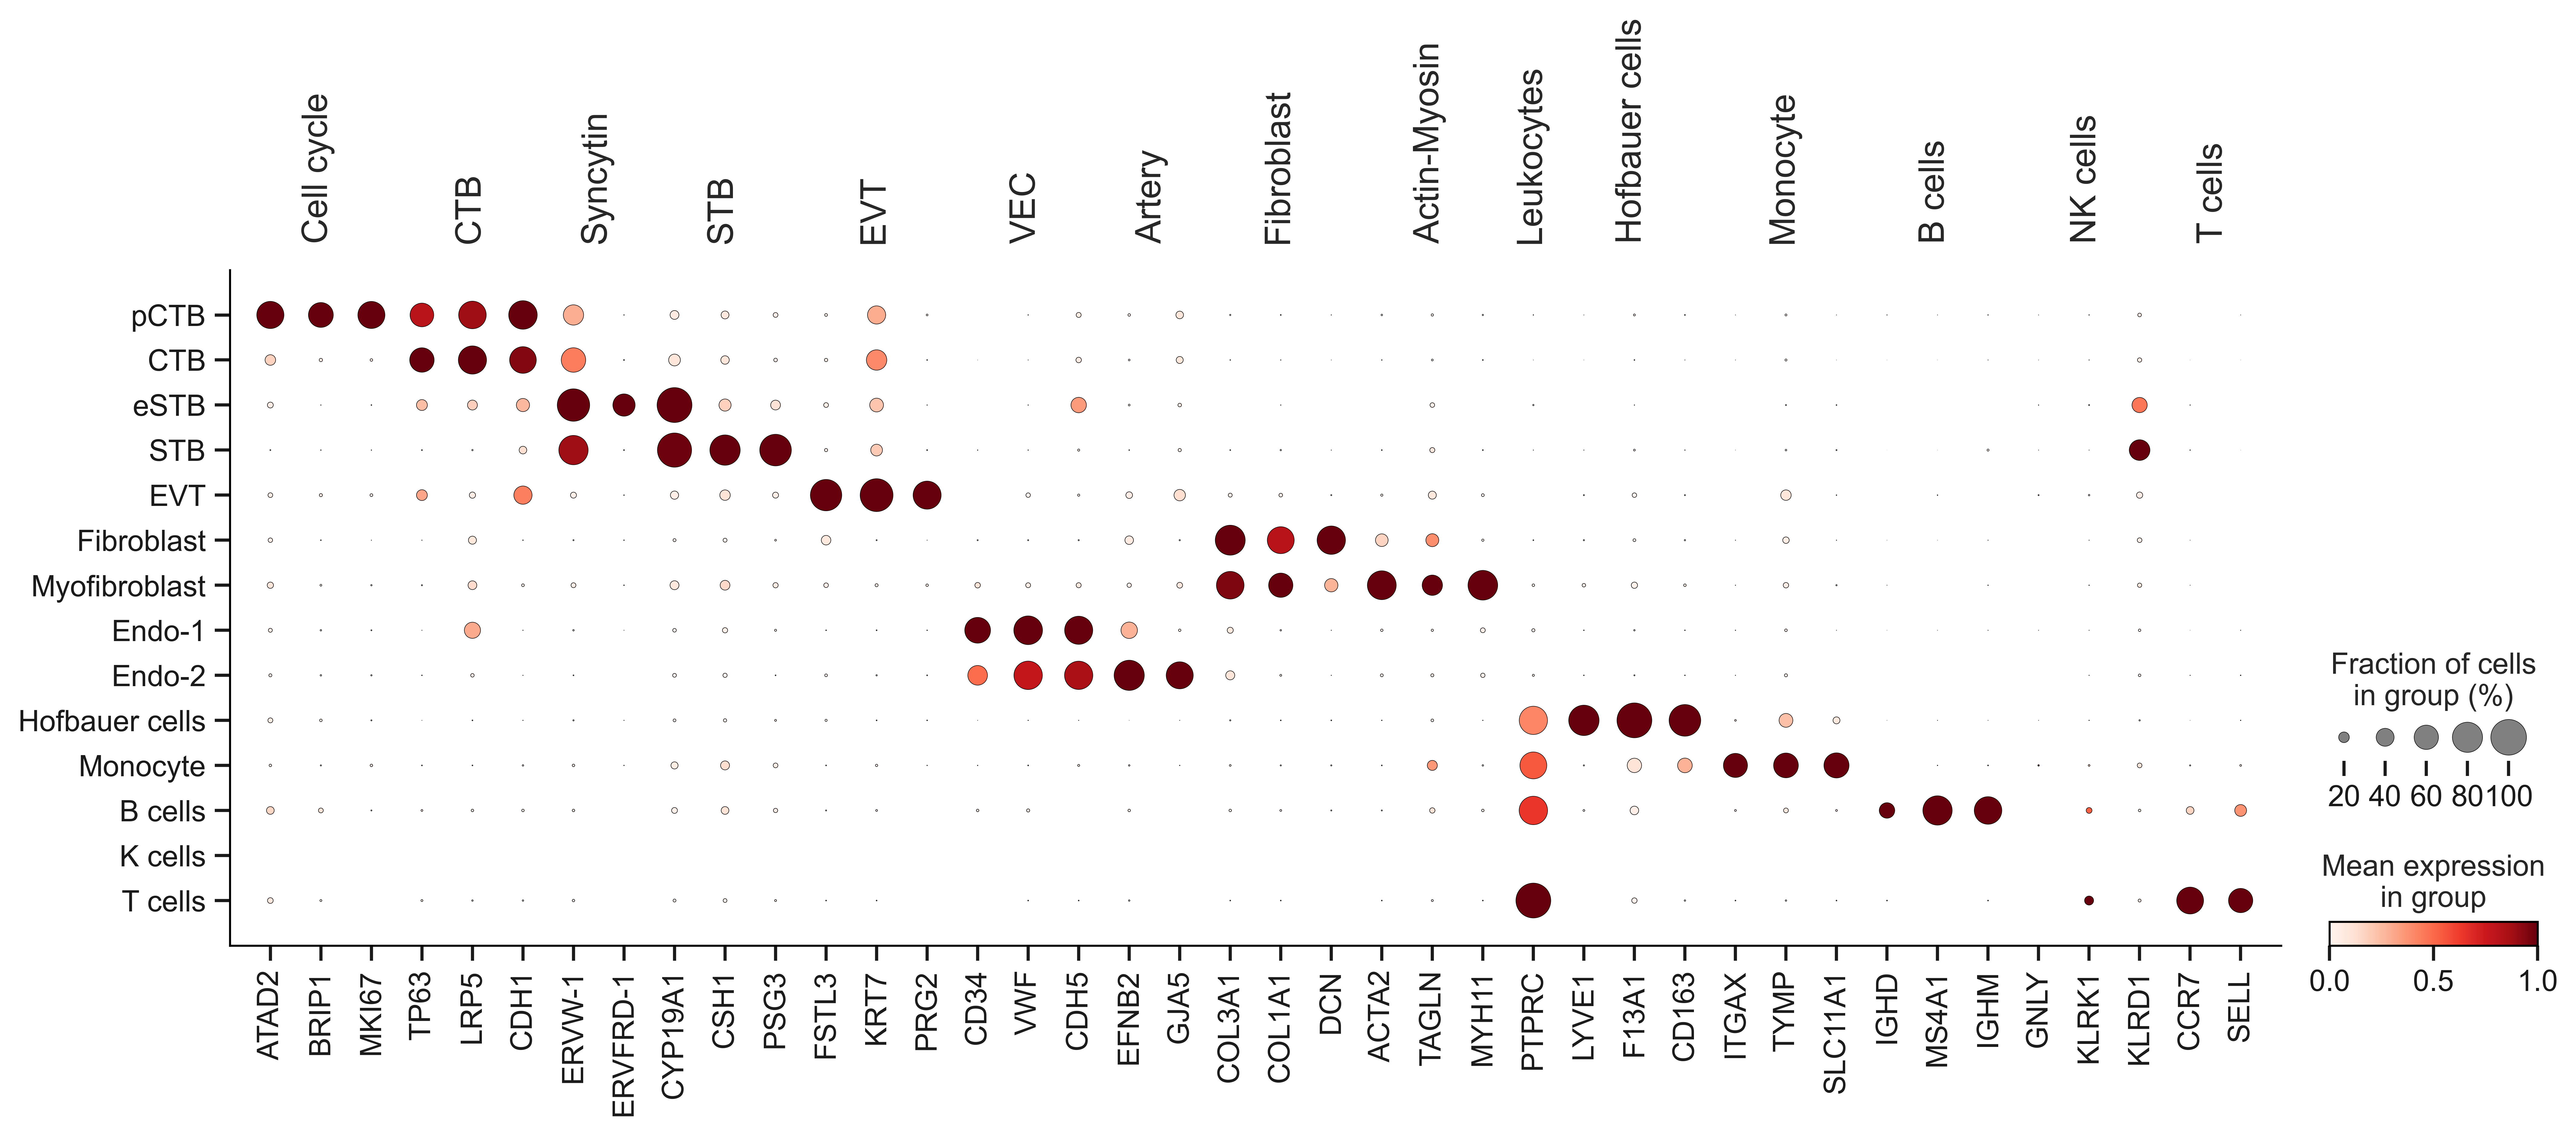

In [6]:
# %config InlineBackend.figure_formats = ['png']
# import warnings
# # warnings.filterwarnings('ignore')
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#004369", "white", "#DB1F48"])
sc.pl.dotplot(ad_clean, marker_dict_coarse, 'subset', standard_scale='var', layer='log_norm', save='figures/markers_fig1f_artery_new.pdf')